## Logistic Regression Homework 
For each pair of 2 digits, (digit_0, digit_1) in the set {(0, 1), (2,7), (3, 4), (8,9)}, do the following:
1. Given the data retrieval method get_mnist_data, select the train and test data corresponding to just the two digits.



In [32]:
from sklearn import linear_model

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy as np
def get_mnist_data():
    import os
    from urllib.request import urlretrieve
    def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
        print("Downloading %s" % filename)
        urlretrieve(source + filename, filename)

    # We then define functions for loading MNIST images and labels.
    # For convenience, they also download the requested files if needed.
    import gzip

    def load_mnist_images(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the inputs in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
        # The inputs are vectors now, we reshape them to monochrome 2D images,
        # following the shape convention: (examples, channels, rows, columns)
        data = data.reshape(-1, 1, 28, 28)
        # The inputs come as bytes, we convert them to float32 in range [0,1].
        # (Actually to range [0, 255/256], for compatibility to the version
        # provided at http://deeplearning.net/data/mnist/mnist.pkl.gz.)
        return data / np.float32(256)

    def load_mnist_labels(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the labels in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
        # The labels are vectors of integers now, that's exactly what we want.
        return data


    x_train = load_mnist_images('train-images-idx3-ubyte.gz')
    y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
    x_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
    y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')
    
    data = {'train': {'X': x_train[0:,0,0:28,0:28].reshape((x_train.shape[0],-1)),
                      'Y': y_train},
            'test': {'X': x_test[0:,0,0:28,0:28].reshape((x_test.shape[0],-1)),
                     'Y': y_test}}
    
    return data



In [35]:
data = get_mnist_data()
"""
Example of accessing a two train vector  (a,b)= (digit_0, digit_1)
"""
a=np.array([0, 2, 3,8] )
b=np.array([1, 7, 4, 9])
a, b

(array([0, 2, 3, 8]), array([1, 7, 4, 9]))

In [37]:
example_a = data['train']['Y']
example_b = data['test']['Y']

print(type(example_a))
print(example_a.shape)
print(example_a)
print(type(example_b))
print(example_b.shape)
print(example_b)


<class 'numpy.ndarray'>
(60000,)
[5 0 4 ... 5 6 8]
<class 'numpy.ndarray'>
(10000,)
[7 2 1 ... 4 5 6]


In [28]:
example_a = data['train']['X']
example_b = data['test']['X']

print(type(example_a))
print(example_a.shape)
print(example_a)
print(type(example_b))
print(example_b.shape)
print(example_b)


<class 'numpy.ndarray'>
(60000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>
(10000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


2. Using cross-fold validation with a number of 5 folds, compute the performance for each logistic regression probability threshold t in [0, 1] with 0.05 increments. Show the curve of accuracy performance for these values (similar to the display made during the logistic regression course).

In [30]:
from sklearn import linear_model
class estimatorWrapper(linear_model.LogisticRegression):
    def __init__(self, t, lr):
        self.lr = lr
        self.t = t
        
    def fit(self, X, y):
        self.lr.fit(X,y)
    
    def predict(self, xVal):
        predProb = self.lr.predict_proba(xVal)
        
        ret = []
        
        def choice(p):
            retVal = 0
            if p[1] > self.t:
                retVal = 1
            return retVal
            
        for p in predProb:
            ret.append(choice(p))
        
        return ret

In [31]:
from sklearn.linear_model import LogisticRegression
arrayData = np.asarray(data)
X, y = arrayData[:, 1:], arrayData[:, 0]


t_range = np.arange(0.0, 1.0, 0.05)
t_scores = []

for t in t_range:
    clf = linear_model.LogisticRegression(C=1e5)
    wrapp = estimatorWrapper(t, clf)
    scores = cross_val_score(wrapp, X, y, cv=10, scoring='accuracy')
    t_scores.append(scores.mean())
    
plt.close()

plt.plot(t_range, t_scores)
plt.xlabel('Value of t for LR')
plt.ylabel('Cross-validated accuracy')

plt.show()

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [38]:
def viewSquareImage(imageOnSingleLine, label=""):
    """
    View a single image.

    Parameters
    ----------
    image : numpy array
        Make sure this is of the shape you want.
    label : str
    """
    from matplotlib.pyplot import show, imshow, cm
    import matplotlib.pyplot as plt
    
    plt.close()
    
    print("Label: %s" % label)
    size = int(len(imageOnSingleLine)**(0.5))
    imageSquare = imageOnSingleLine.reshape((size, size))
    imshow(imageSquare, cmap=cm.gray)
    show()   
    
def viewImageByIndex(dataDict, idx, trainOrTest="test"):
    viewSquareImage(dataDict[trainOrTest]['X'][idx], dataDict[trainOrTest]['Y'][idx])
    

Label: 5


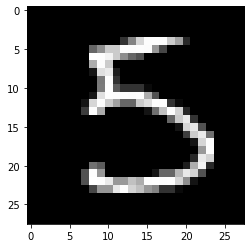

In [39]:
"""
Example of displaying a single image
"""

imageId = 15
viewImageByIndex(data, imageId)